## Data processing

### Include only position players appearing after 1975

In [1]:
import pandas as pd
df = pd.read_csv('bsb_ref.csv')
df = df.fillna(df.mean())     
df = df[df.year_ID >= 1975]    # drop rows before 1975
df = df[df.pitcher == 'N']     # drop pitchers

# player MLB ID => player name
playerNameToID = {row['mlb_ID']: row['name_common'] for __, row in df.iterrows()}

### Filter out players who appeared in 2012-2017

In [2]:
players = list(set(df.name_common))     # list of all players
metrics = [col for col in df.columns if df[col].dtype != 'object']    # should have 41 things
years = [2012, 2013, 2014, 2015, 2016, 2017]

In [3]:
df_2012 = pd.DataFrame(columns=df.columns)
df_2013 = pd.DataFrame(columns=df.columns)
df_2014 = pd.DataFrame(columns=df.columns)
df_2015 = pd.DataFrame(columns=df.columns)
df_2016 = pd.DataFrame(columns=df.columns)
df_2017 = pd.DataFrame(columns=df.columns)

# only consider players that appeared in 'years_appeared_in'
def eligible_player(player, years_appeared_in, years_of_interest):
    return set(years_of_interest).issubset(years_appeared_in)

for player in players:
    player_rows = df[df.name_common == player]
    if not eligible_player(player, player_rows.year_ID.values, years):
        continue
    df_2012 = df_2012.append(player_rows[player_rows.year_ID == 2012].head(1))
    df_2013 = df_2013.append(player_rows[player_rows.year_ID == 2013].head(1))
    df_2014 = df_2014.append(player_rows[player_rows.year_ID == 2014].head(1))
    df_2015 = df_2015.append(player_rows[player_rows.year_ID == 2015].head(1))
    df_2016 = df_2016.append(player_rows[player_rows.year_ID == 2016].head(1))
    df_2017 = df_2017.append(player_rows[player_rows.year_ID == 2017].head(1))

In [4]:
df_2012.head()

,name_common,age,mlb_ID,player_ID,year_ID,team_ID,stint_ID,lg_ID,PA,G,...,oppRpG_rep,pyth_exponent,pyth_exponent_rep,waa_win_perc,waa_win_perc_off,waa_win_perc_def,waa_win_perc_rep,OPS_plus,TOB_lg,TB_lg
62329,Andrew McCutchen,25.0,457705.0,mccutan01,2012,PIT,1,NL,673.0,157,...,4.15897,1.866,1.837,0.5313,0.5354,0.4985,0.4858,161.6879,215.293,239.868
60872,Jeff Mathis,29.0,425772.0,mathije01,2012,TOR,1,AL,227.0,70,...,4.28892,1.856,1.852,0.4989,0.4929,0.5119,0.4871,71.6522,71.405,87.713
46150,Chris Iannetta,29.0,455104.0,iannech01,2012,LAA,1,AL,253.0,79,...,4.29043,1.863,1.853,0.5049,0.5049,0.5061,0.4872,105.5347,79.088,88.599
60319,Michael Martinez,29.0,492841.0,martimi02,2012,PHI,1,NL,122.0,45,...,4.20497,1.831,1.840,0.4878,0.4757,0.5140,0.4908,23.7332,39.492,47.990
84928,Jarrod Saltalamacchia,27.0,457454.0,saltaja01,2012,BOS,1,AL,448.0,121,...,4.27168,1.862,1.851,0.5000,0.5034,0.5015,0.4852,96.8136,145.869,169.776


### Drop string-valued columns

In [5]:
df_2012 = df_2012.select_dtypes(exclude=['object'])
df_2013 = df_2013.select_dtypes(exclude=['object'])
df_2014 = df_2014.select_dtypes(exclude=['object'])
df_2015 = df_2015.select_dtypes(exclude=['object'])
df_2016 = df_2016.select_dtypes(exclude=['object'])
df_2017 = df_2017.select_dtypes(exclude=['object'])

# assert OPS+ is actually at the same place in all dataframes
ops_plus_indexes = [df_2012.columns.get_loc('OPS_plus'),
                    df_2013.columns.get_loc('OPS_plus'),
                    df_2014.columns.get_loc('OPS_plus'),
                    df_2015.columns.get_loc('OPS_plus'),
                    df_2016.columns.get_loc('OPS_plus'),
                    df_2017.columns.get_loc('OPS_plus')]
ops_plus_index = ops_plus_indexes[0]
for i in range(1, len(ops_plus_indexes)):
    assert ops_plus_index == ops_plus_indexes[i]
    
print('ops_plus_index = ', ops_plus_index)

ops_plus_index =  38


### Convert to numpy arrays

In [6]:
np_2012 = df_2012.to_numpy()
np_2013 = df_2013.to_numpy()
np_2014 = df_2014.to_numpy()
np_2015 = df_2015.to_numpy()
np_2016 = df_2016.to_numpy()
np_2017 = df_2017.to_numpy()

print('np_2013 shape = ', np_2013.shape)
print('np_2014 shape = ', np_2014.shape)
print('np_2015 shape = ', np_2015.shape)
print('np_2016 shape = ', np_2016.shape)
print('np_2017 shape = ', np_2017.shape)

np_2013 shape =  (222, 41)
np_2014 shape =  (222, 41)
np_2015 shape =  (222, 41)
np_2016 shape =  (222, 41)
np_2017 shape =  (222, 41)


### Smush data into [0, 1]

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
np_2012_scaled = scaler.fit_transform(np_2012)
np_2013_scaled = scaler.fit_transform(np_2013)
np_2014_scaled = scaler.fit_transform(np_2014)
np_2015_scaled = scaler.fit_transform(np_2015)
np_2016_scaled = scaler.fit_transform(np_2016)
np_2017_scaled = scaler.fit_transform(np_2017)

### Split into train and test sets

In [9]:
import numpy as np
np_X = np.stack([np_2012_scaled, np_2013_scaled, np_2014_scaled, 
                 np_2015_scaled, np_2016_scaled], axis=1)
np_y = np_2017_scaled[:,ops_plus_index]

print('np_X shape = ', np_X.shape)
print('np_y shape = ', np_y.shape)

np_X shape =  (222, 5, 41)
np_y shape =  (222,)


In [10]:
player_count, __, __ = np_X.shape
train_size = int(player_count*0.8)

X_train = np_X[:train_size,...]
y_train = np_y[:train_size,...]
X_test = np_X[train_size:,...]
y_test = np_y[train_size:,...]

print('X_train shape = ', X_train.shape)
print('y_train shape = ', y_train.shape)
print('X_test shape = ', X_test.shape)
print('y_test shape = ', y_test.shape)

X_train shape =  (177, 5, 41)
y_train shape =  (177,)
X_test shape =  (45, 5, 41)
y_test shape =  (45,)


## RNN with LSTM

### Build model

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1:])))

model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.6))

model.add(LSTM(units=50))
model.add(Dropout(0.8))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 5, 50)             18400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 50)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 5, 50)             20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 50)             0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 5, 50)             20200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 5, 50)             0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)               

### Train model

In [12]:
model.fit(X_train, y_train, epochs=300, batch_size=32)

Epoch 1/300
177/177 [==============================] - 2s 11ms/step - loss: 0.0477
Epoch 2/300
177/177 [==============================] - 0s 590us/step - loss: 0.0159
Epoch 3/300
177/177 [==============================] - 0s 641us/step - loss: 0.0168
Epoch 4/300
177/177 [==============================] - 0s 692us/step - loss: 0.0122
Epoch 5/300
177/177 [==============================] - 0s 586us/step - loss: 0.0116
Epoch 6/300
177/177 [==============================] - 0s 617us/step - loss: 0.0095
Epoch 7/300
177/177 [==============================] - 0s 715us/step - loss: 0.0088
Epoch 8/300
177/177 [==============================] - 0s 644us/step - loss: 0.0086
Epoch 9/300
177/177 [==============================] - 0s 605us/step - loss: 0.0094
Epoch 10/300
177/177 [==============================] - 0s 611us/step - loss: 0.0087
Epoch 11/300
177/177 [==============================] - 0s 628us/step - loss: 0.0080
Epoch 12/300
177/177 [==============================] - 0s 963us/step - los

177/177 [==============================] - 0s 573us/step - loss: 0.0035
Epoch 98/300
177/177 [==============================] - 0s 756us/step - loss: 0.0034
Epoch 99/300
177/177 [==============================] - 0s 717us/step - loss: 0.0030
Epoch 100/300
177/177 [==============================] - 0s 508us/step - loss: 0.0034
Epoch 101/300
177/177 [==============================] - 0s 480us/step - loss: 0.0030
Epoch 102/300
177/177 [==============================] - 0s 534us/step - loss: 0.0034
Epoch 103/300
177/177 [==============================] - 0s 753us/step - loss: 0.0030
Epoch 104/300
177/177 [==============================] - 0s 757us/step - loss: 0.0032
Epoch 105/300
177/177 [==============================] - 0s 556us/step - loss: 0.0033
Epoch 106/300
177/177 [==============================] - 0s 783us/step - loss: 0.0034
Epoch 107/300
177/177 [==============================] - 0s 559us/step - loss: 0.0033
Epoch 108/300
177/177 [==============================] - 0s 778us/step

177/177 [==============================] - 0s 504us/step - loss: 0.0026
Epoch 193/300
177/177 [==============================] - 0s 556us/step - loss: 0.0025
Epoch 194/300
177/177 [==============================] - 0s 508us/step - loss: 0.0026
Epoch 195/300
177/177 [==============================] - 0s 637us/step - loss: 0.0024
Epoch 196/300
177/177 [==============================] - 0s 627us/step - loss: 0.0025
Epoch 197/300
177/177 [==============================] - 0s 444us/step - loss: 0.0024
Epoch 198/300
177/177 [==============================] - 0s 563us/step - loss: 0.0026
Epoch 199/300
177/177 [==============================] - 0s 535us/step - loss: 0.0023
Epoch 200/300
177/177 [==============================] - 0s 566us/step - loss: 0.0024
Epoch 201/300
177/177 [==============================] - 0s 517us/step - loss: 0.0022
Epoch 202/300
177/177 [==============================] - 0s 538us/step - loss: 0.0024
Epoch 203/300
177/177 [==============================] - 0s 510us/st

177/177 [==============================] - 0s 541us/step - loss: 0.0022
Epoch 288/300
177/177 [==============================] - 0s 1ms/step - loss: 0.0018
Epoch 289/300
177/177 [==============================] - 0s 610us/step - loss: 0.0019
Epoch 290/300
177/177 [==============================] - 0s 513us/step - loss: 0.0020
Epoch 291/300
177/177 [==============================] - 0s 545us/step - loss: 0.0021
Epoch 292/300
177/177 [==============================] - 0s 1ms/step - loss: 0.0022
Epoch 293/300
177/177 [==============================] - 0s 932us/step - loss: 0.0020
Epoch 294/300
177/177 [==============================] - 0s 561us/step - loss: 0.0020
Epoch 295/300
177/177 [==============================] - 0s 559us/step - loss: 0.0020
Epoch 296/300
177/177 [==============================] - 0s 549us/step - loss: 0.0020
Epoch 297/300
177/177 [==============================] - 0s 1ms/step - loss: 0.0024
Epoch 298/300
177/177 [==============================] - 0s 595us/step - l

### Evaluate model

In [13]:
from sklearn.metrics import r2_score, mean_squared_error
def evaluate(y_pred, y_actual, name):
    print(name)
    print('*'*50)
    print('R2 score = ', r2_score(y_actual, y_pred))
    print('MSE = ', mean_squared_error(y_actual, y_pred))
    num_examples = y_actual.shape[0]
    for i in range(num_examples):
        print('Predicted = {}; Actual = {}'.format(y_pred[i,0], y_actual[i]))

#### Test set

In [14]:
y_test_pred = model.predict(X_test)
evaluate(y_test_pred, y_test, 'TEST')

TEST
**************************************************
R2 score =  0.052492027463886703
MSE =  0.014922887497381927
Predicted = 0.14526580274105072; Actual = 0.14931574909963555
Predicted = 0.2791406214237213; Actual = 0.27256974951497526
Predicted = 0.26884713768959045; Actual = 0.22667716208907374
Predicted = 0.23507043719291687; Actual = 0.1489405089508305
Predicted = 0.32127487659454346; Actual = 0.36295779868675726
Predicted = 0.2775012254714966; Actual = 0.2953229624476221
Predicted = 0.23635125160217285; Actual = 0.2689273771756838
Predicted = 0.2810227870941162; Actual = 0.212038721132019
Predicted = 0.2718091607093811; Actual = 0.271963366650703
Predicted = 0.3071545362472534; Actual = 0.28185376457804723
Predicted = 0.31130605936050415; Actual = 0.3845980056524012
Predicted = 0.284117728471756; Actual = 0.2827961031098639
Predicted = 0.2822878062725067; Actual = 0.2604393211250423
Predicted = 0.22096002101898193; Actual = 0.21722247959081545
Predicted = 0.31093883514404297; 

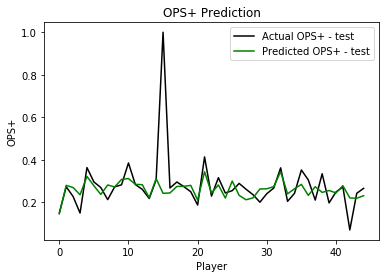

In [18]:
import matplotlib.pyplot as plt
plt.plot(y_test, color='black', label = 'Actual OPS+ - test')
plt.plot(y_test_pred, color='green', label = 'Predicted OPS+ - test')
plt.title('OPS+ Prediction')
plt.xlabel('Player')
plt.ylabel('OPS+')
plt.legend()
plt.show()

#### Train set

In [19]:
y_train_pred = model.predict(X_train)
evaluate(y_train_pred, y_train, 'TRAIN')

TRAIN
**************************************************
R2 score =  0.5589185583037197
MSE =  0.0015174811353286812
Predicted = 0.3117862045764923; Actual = 0.3096003447906007
Predicted = 0.2144172191619873; Actual = 0.19401089337474559
Predicted = 0.23513750731945038; Actual = 0.2984935949994931
Predicted = 0.22048865258693695; Actual = 0.3408422657984742
Predicted = 0.027848124504089355; Actual = 0.0
Predicted = 0.29523876309394836; Actual = 0.3085769922040681
Predicted = 0.22709007561206818; Actual = 0.26680405911385296
Predicted = 0.2205357551574707; Actual = 0.33698439933376134
Predicted = 0.23885875940322876; Actual = 0.24109456671173243
Predicted = 0.26855048537254333; Actual = 0.299072918843478
Predicted = 0.2873819172382355; Actual = 0.28463187832960435
Predicted = 0.2190522849559784; Actual = 0.2299258745850271
Predicted = 0.26108354330062866; Actual = 0.2625763317031632
Predicted = 0.266150563955307; Actual = 0.31544264808048855
Predicted = 0.049259379506111145; Actual = 0.

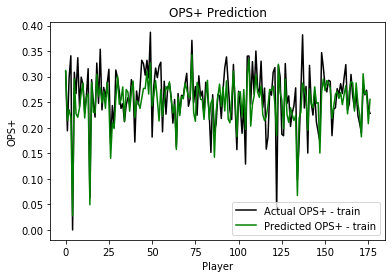

In [20]:
import matplotlib.pyplot as plt
plt.plot(y_train, color='black', label = 'Actual OPS+ - train')
plt.plot(y_train_pred, color='green', label = 'Predicted OPS+ - train')
plt.title('OPS+ Prediction')
plt.xlabel('Player')
plt.ylabel('OPS+')
plt.legend()
plt.show()